# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from kmeans.kmeans import kmeans
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
kmeans_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
kmeans_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
kmeans_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    kmeans_hit_rate_list.append(kmeans_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    kmeans_y_pred = [kmeans_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    kmeans_confusion_matrix_list.append(confusion_matrix(y_test, kmeans_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
kmeans_std_dev = np.std(kmeans_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.8709677419354839, 0.8064516129032258, 0.8064516129032258, 0.8064516129032258, 0.8225806451612904, 0.7903225806451613, 0.8870967741935484, 0.8548387096774194, 0.7580645161290323, 0.8064516129032258, 0.8709677419354839, 0.7580645161290323, 0.7903225806451613, 0.7903225806451613, 0.8064516129032258, 0.7903225806451613, 0.8870967741935484, 0.7741935483870968, 0.8548387096774194, 0.9032258064516129]

Accuracy:
0.821774193548387

Standard Deviation:
0.04342126008378003

Confusion Matrix:
    SL  DH  NO
SL  30   0   0
DH   0  12   7
NO   0   1  12
    NO  SL  DH
NO  16   0   2
SL   2  26   0
DH   8   0   8
    DH  NO  SL
DH   7   8   0
NO   3  13   0
SL   0   1  30
    SL  DH  NO
SL  27   0   0
DH   0   7   6
NO   1   5  16
    SL  NO  DH
SL  24   0   0
NO   2  22   4
DH   0   5   5
    SL  NO  DH
SL  26   4   0
NO   1  17   3
DH   0   5   6
    SL  DH  NO
SL  30   0   0
DH   0   8   2
NO   0   5  17
    NO  SL  DH
NO  18   0   2
SL  

# Confusion Matrix Mean

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,SL,DH,NO
SL,28,0,1
DH,0,6,5
NO,0,3,15


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.8387096774193549, 0.7580645161290323, 0.8064516129032258, 0.7258064516129032, 0.6935483870967742, 0.7419354838709677, 0.8064516129032258, 0.7580645161290323, 0.7741935483870968, 0.8064516129032258, 0.7903225806451613, 0.7096774193548387, 0.7419354838709677, 0.7258064516129032, 0.7903225806451613, 0.8387096774193549, 0.8064516129032258, 0.7419354838709677, 0.7903225806451613, 0.8709677419354839]

Accuracy:
0.7758064516129033

Standard Deviation:
0.045591271048717956

Confusion Matrix:
    SL  DH  NO
SL  27   0   3
DH   0  16   3
NO   0   4   9
    NO  SL  DH
NO  11   0   7
SL   5  23   0
DH   3   0  13
    DH  NO  SL
DH  13   2   0
NO   6   9   1
SL   0   3  28
    SL  DH  NO
SL  21   2   4
DH   0  11   2
NO   2   7  13
    SL  NO  DH
SL  19   4   1
NO   1  16  11
DH   0   2   8
    SL  NO  DH
SL  22   7   1
NO   1  14   6
DH   0   1  10
    SL  DH  NO
SL  26   1   3
DH   0   8   2
NO   0   6  16
    NO  SL  DH
NO  16   0   4
SL

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,SL,DH,NO
SL,25,1,3
DH,0,9,2
NO,0,5,13


# Showing kmeans informations computed

In [8]:
print('----------------- KMEANS model -----------------')
print('Hit rate:')
print(kmeans_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(kmeans_hit_rate_list)/len(kmeans_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(kmeans_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in kmeans_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KMEANS model -----------------
Hit rate:
[0.7903225806451613, 0.7580645161290323, 0.8548387096774194, 0.8548387096774194, 0.8387096774193549, 0.7903225806451613, 0.9354838709677419, 0.8870967741935484, 0.7903225806451613, 0.8387096774193549, 0.8387096774193549, 0.7419354838709677, 0.8064516129032258, 0.8387096774193549, 0.8064516129032258, 0.8387096774193549, 0.8387096774193549, 0.8064516129032258, 0.7903225806451613, 0.8709677419354839]

Accuracy:
0.825806451612903

Standard Deviation:
0.04375696763306625

Confusion Matrix:
    SL  DH  NO
SL  29   0   1
DH   0   8  11
NO   0   1  12
    NO  SL  DH
NO  17   0   1
SL   4  24   0
DH  10   0   6
    DH  NO  SL
DH   9   4   2
NO   2  14   0
SL   0   1  30
    SL  DH  NO
SL  25   0   2
DH   0  11   2
NO   1   4  17
    SL  NO  DH
SL  23   1   0
NO   2  20   6
DH   0   1   9
    SL  NO  DH
SL  27   3   0
NO   2  17   2
DH   0   6   5
    SL  DH  NO
SL  30   0   0
DH   0   7   3
NO   0   1  21
    NO  SL  DH
NO  16   0   4
S

In [9]:
confusion_matrix_mean(kmeans_confusion_matrix_list)

,SL,DH,NO
SL,28,0,1
DH,0,7,5
NO,0,2,15


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
          0      1
222   56.10  13.11
41    46.44   8.40
89    71.19  23.90
234   37.73   9.39
148   65.76   9.83
..      ...    ...
279   48.80  18.02
250   36.16  -0.81
175   56.56   8.96
162  118.14  38.45
157   44.22   1.51

[248 rows x 2 columns]
Test dataset:
         0      1
246  46.64  15.85
31   46.39  11.08
270  51.31   8.88
61   89.68  32.70
268  57.15  16.49
..     ...    ...
168  95.38  24.82
125  48.06   5.69
144  60.04  14.31
17   31.28   3.14
92   85.35  15.84

[62 rows x 2 columns]


# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
kmeans_model = kmeans(k=25, type_distance_calc='euclidean', number_iteration=300)
kmeans_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

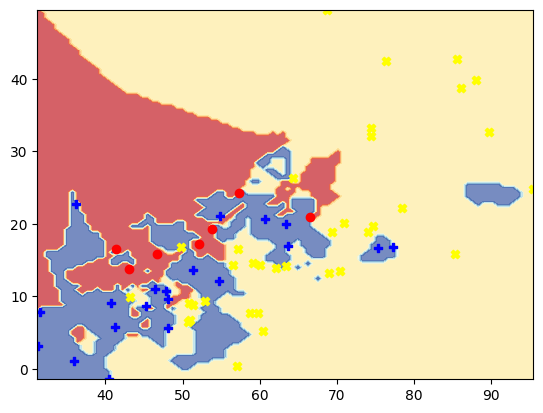

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

dh = np.where(knn_y_pred == 'DH')
sl = np.where(knn_y_pred == 'SL')
no = np.where(knn_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting dmc decision surface

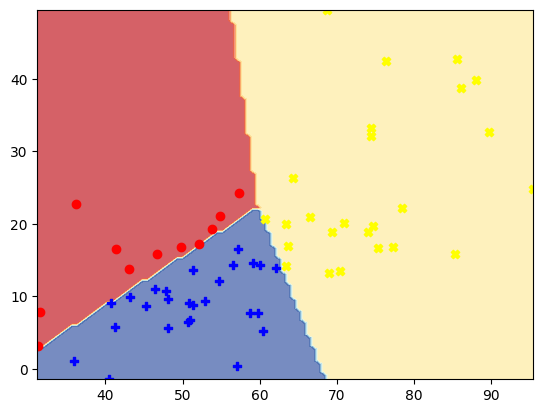

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    else:
        y_pred[0][i] = 3

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()

# Plotting kmeans decision surface

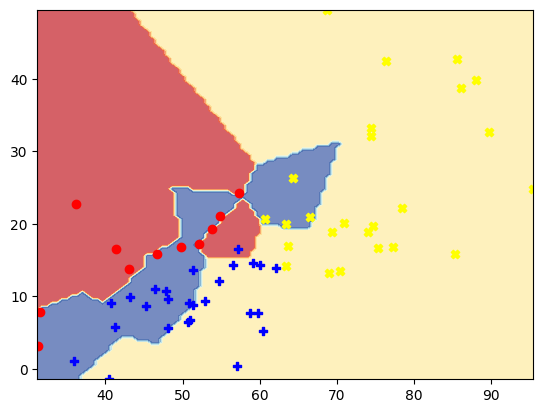

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[kmeans_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'DH':
        y_pred[0][i] = 1
    elif y == 'SL':
        y_pred[0][i] = 2
    elif y == 'NO':
        y_pred[0][i] = 3
    else:
        y_pred[0][i] = 4

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

kmeans_y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

dh = np.where(dmc_y_pred == 'DH')
sl = np.where(dmc_y_pred == 'SL')
no = np.where(dmc_y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='yellow', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='blue', marker='P', label='no')

plt.show()